<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


### CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)
**Disciplina:** PARADIGMAS DE LINGUAGEM DE PROGRAMAÇÃO EM CIÊNCIA DE DADOS [TURMA 01D] - 2022/1 - Trilha 1.<br>
**Aluno:** ROBSON DE FREITAS SAMPAIO.

#### Dicionário de Termos da biografia em inglês da banda de Rock **The Ramones**, visando confirmar a lei de Zipf. Escolhi esse texto por gostar muito da banda e por querer testar a lei de Zipf na língua inglesa.
---





Aqui, criamos um dicionário de termos (palavras) sobre a biografia em inglês da banda de Rock **The Ramones**. 

1. A primeira célula obtém o texto da biografia da banda na variável `texto`. 
2. Na segunda célula cria o dicionário de termos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos termos do seu dicionário para confirmar a lei de Zipf.

#### Aquisição dos Dados

In [14]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://rfsampaio.github.io/docs/TheRamones-Biography.txt'):
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','')
    texto[i] = texto[i].replace('\"','')
    texto[i] = texto[i].replace('“','')
    texto[i] = texto[i].replace('”','')
    texto[i] = texto[i].replace('’','')
    texto[i] = texto[i].replace('_','')
    texto[i] = texto[i].replace('!','')
    texto[i] = texto[i].replace('-','')
    texto[i] = texto[i].replace('–','')
    


#### Construção do Dicionário

In [15]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
  # print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

# quantidade de palavras no dicionário
# print(len(mydict.keys()))

# imprime o dicionário
# print(mydict)

# ordenar, de forma decrescente, as palavras do dicionário pelo valor
sortedmydict = sorted(mydict.items(), key=lambda x: x[1], reverse=True)

print(sortedmydict)

[('the', 217), ('of', 84), ('a', 81), ('and', 78), ('in', 59), ('to', 45), ('ramones', 34), ('their', 33), ('on', 30), ('was', 27), ('as', 27), ('with', 25), ('by', 23), ('for', 23), ('at', 22), ('band', 21), ('dee', 20), ('ramone', 18), ('rock', 16), ('were', 16), ('they', 16), ('new', 14), ('after', 13), ('it', 13), ('an', 12), ('his', 12), ('album', 12), ('he', 11), ('would', 10), ('bands', 10), ('had', 10), ('pop', 9), ('into', 8), ('who', 8), ('music', 8), ('its', 7), ('but', 7), ('that', 7), ('johnny', 7), ('high', 7), ('first', 7), ('lp', 6), ('roll', 6), ('songs', 6), ('about', 6), ('most', 6), ('group', 6), ('joey', 6), ('also', 6), ('up', 6), ('school', 6), ('former', 6), ('early', 6), ('two', 6), ('sound', 6), ('no', 6), ('more', 5), ('this', 5), ('punk', 5), ('career', 5), ('when', 5), ('some', 5), ('you', 5), ('all', 5), ('from', 5), ('took', 5), ('guitar', 5), ('tommy', 5), ('1974', 5), ('which', 5), ('began', 5), ('not', 5), ('one', 5), ('i', 5), ('albums', 5), ('than', 

#### Exibição dos Resultados

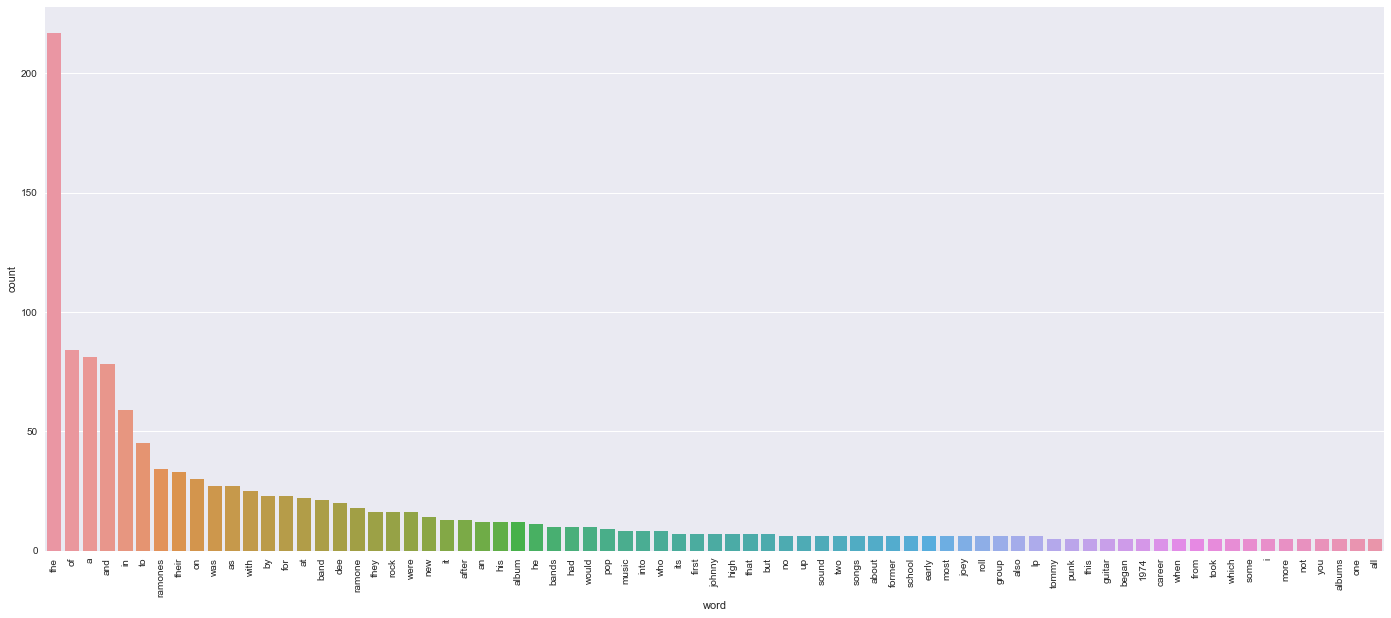

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

O gráfico de distribuição dos termos acima confirma a lei de Zipf.